This notebook follows the [Hello world](https://docs.quantum.ibm.com/start/hello-world) tutorial on Qiskit's website.
It can also be found on [Github](https://github.com/Qiskit/documentation/blob/main/docs/start/hello-world.ipynb).

First we'll install the Qiskit packages. I've included if statements that check whether the package is already installed and can be skipped.

In [1]:
import os

if os.system("import Qiskit") == 0:
    !pip install Qiskit
else:
    print("Qiskit package already installed.")
    
if os.system("import qiskit-ibm-runtime") == 0:
    !pip install qiskit-ibm-runtime
else:
    print("qiskit-ibm-runtime package already installed.")    
    
if os.system("import qiskit[visualization]") == 0:
    !pip install qiskit[visualization]
else:
    print("qiskit[visualization] package already installed.")

Qiskit package already installed.
qiskit-ibm-runtime package already installed.
qiskit[visualization] package already installed.


# Hello world

This Hello world example creates a simple quantum program and runs it on a quantum system.

The four steps to writing a quantum program are

1.  Map the problem to a quantum-native format

2.  Optimize the circuits and operators

3.  Execute using a quantum primitive function

4.  Analyze the results

## TODO
Qiskit uses the LSb 0 bit numbering where qubits are labeled with indices increasing **from right to left**. 


## Step 1. Map the problem to a quantum-native format

In a quantum program, *quantum circuits* are the native format in which to represent quantum instructions, and *operators* represent the observables to be measured. When creating a circuit, you'll usually create a new [`QuantumCircuit`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit) object, then add instructions to it in sequence.

The following code cell creates a circuit that produces a *Bell state,* which is a specific two-qubit entangled state.

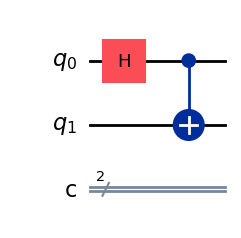

In [4]:
from qiskit import QuantumCircuit

# QuantumCircuit(number of qubits, number of bits)
# Create a new circuit with two qubits (first argument) and two classical bits (second argument)
qc = QuantumCircuit(2, 2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw(output="mpl")

[Visualization](https://docs.quantum.ibm.com/build/circuit-visualization)

The following code cell uses the [`quantum_info`](https://docs.quantum.ibm.com/api/qiskit/quantum_info) package which contains the [`Pauli operator`](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Pauli). We'll use that to create the two-qubit Pauli operator Z on qubit 1 and Z on qubit 2. If the state is entangled, then the correlation between qubit 1 and qubit 2 is one. 

Note that in the string representation qubit-0 corresponds to the right-most Pauli character, and qubit-:math:`(n-1)` to the left-most Pauli character. For example ``'XYZ'`` represents  :math:`X\otimes Y \otimes Z` with ``'Z'`` on qubit-0, ``'Y'`` on qubit-1, and ``'X'`` on qubit-2.  In the string representation qubit-0 corresponds to the right-most Pauli character, and qubit-:math:`(n-1)` to the left-most Pauli character. For example ``'XYZ'`` represents
== :math:`X\otimes Y \otimes Z` with ``'Z'`` on qubit-0, == ``'Y'`` on qubit-1, and ``'X'`` on qubit-2.

In [6]:
from qiskit.quantum_info import Pauli
from qiskit.circuit.library import PauliGate

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

Qiskit has an *instruction set architecture (ISA)* for circuits and observables that we must follow in order to use the [Qiskit Runtime primitives](https://docs.quantum.ibm.com/run/primitives).

Circuits that do not follow the *ISA* circuit layout will need to be transformed using the [Qiskit transpiler](https://docs.quantum.ibm.com/transpile).

https://docs.quantum.ibm.com/start/setup-channelhttps://docs.quantum.ibm.com/start/setup-channel

In [10]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
#from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit_ibm_runtime import QiskitRuntimeService, RuntimeOptions

# Initialize account.
# service = QiskitRuntimeService(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>")
MY_IBM_QUANTUM_TOKEN = "fbadf7fc4052e2bc1f25b66720afbdda09dd36ad1da2828ceff230e78e5936eba82c1cb17d55ae43494fd092219fbe8e445d526f7a4eefbc01bf221ebcf077da"
channel = "ibm_quantum"
service = QiskitRuntimeService(channel = channel, token = MY_IBM_QUANTUM_TOKEN)

# Load saved credentials
service = QiskitRuntimeService()

# Set backend
backend = service.get_backend("ibmq_qasm_simulator")
# backend = service.get_backend("ibm_brisbane")

# Save an IBM Quantum account and set it as your default account.
# QiskitRuntimeService.save_account(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>", set_as_default=True)
# RuntimeOptions(backend = backend).validate(channel = channel)
if (RuntimeOptions(backend = backend).validate(channel = channel)) != None:
    QiskitRuntimeService.save_account(channel = channel, token = MY_IBM_QUANTUM_TOKEN, set_as_default=True)

# Set options, which can be overwritten at job level.
#options = Options(optimization_level=1)

pm = generate_preset_pass_manager(optimization_level = 1, backend = backend)

isa_circuit = pm.run(qc)
#isa_observable = observable.apply_layout(isa_circuit.layout)
# ZZ = ZZ.apply_layout(isa_circuit.layout)
# ZI = ZI.apply_layout(isa_circuit.layout)
# ZI = ZI.apply_layout(isa_circuit.layout)
# IZ = IZ.apply_layout(isa_circuit.layout)
# XX = XX.apply_layout(isa_circuit.layout)
# IX = IX.apply_layout(isa_circuit.layout)
# XI = XI.apply_layout(isa_circuit.layout)

# ZZ = ZZ.compose(isa_circuit)
# ZZ = transpile(ZZ, backend = backend)

QiskitError: 'Pauli can only be multiplied by 1, -1j, -1, 1j.'

## Step 2. Optimize the circuits and operators

For this example, the circuit the operators are simple, so no optimizations are needed.


## Step 3. Execute using a quantum primitive function

Quantum computers can produce random results, so you'll often want to collect a sample of the outputs by running the circuit many times. You can estimate the value of the observable using the `Estimator` class. `Estimator` is one of our two [primitives](../run/primitives-get-started); the other is `Sampler`, which can be used to get data from a quantum computer.


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

service = QiskitRuntimeService()

# Run on the least-busy backend you have access to
backend = service.least_busy(simulator=False, operational=True)

options = Options()
options.resilience_level = 1
options.optimization_level = 3

# Create an Estimator object
estimator = Estimator(backend, options=options)

# Submit the circuit to Estimator
job = estimator.run(circuits=[isa_circuit]*6, observables=[IZ, IX, ZI, XI, ZZ, XX], shots = 5000)

# Once the job is complete, get the result
job.result()

<Admonition type="note" title="Queue times">
  Queue times on real devices may vary. If you would like to get a faster result, replace the `backend =` line with the following instead:

  ```python



  # Run on a simulator



  backend = service.get_backend("ibmq_qasm_simulator")



  ```
</Admonition>


The `values` property is a list of expectation values for each of the observables we provided.


## Step 4. Analyze the results


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result().values

# creating error bars
error = []
for case in job.result().metadata:
    error.append(2*np.sqrt(case['variance']/case['shots']))

# plotting graph
plt.plot(data, values)
plt.errorbar(data, values, yerr = error, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()

Here we see that for qubits 0 and 1, the independent values of both X and Z are zero, while the correlations are one. This is a hallmark of quantum entanglement.
